In [34]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import plot, title, xlabel, ylabel, savefig, legend, ylim
from numpy import array, arange
from statistics import mean
import glob

words_dir = 'english_words/500_common'
word_txt = 'common_words_*.txt'
ftitle = '500_common_words_with_respeaking'
plot_title = ' (500 Common Words + Respeaking)'
data = pd.read_pickle(ftitle+'.data')

In [35]:
word_dict = []
for txt_fn in sorted(glob.glob(path.join(words_dir, word_txt))):
    txt_file = open(txt_fn, "r")
    query = txt_file.read()
    word_dict.append(query.lower())

In [39]:
tp = []
fn = []
fp = []
tn = []
dtw_threshold = 0.28522107752155723

for sent in data['result']:
    for index, dtw in enumerate(sent['correct_dtw']):
        if dtw < dtw_threshold:
            tp.append(sent['correct_words'][index])
        else:
            fn.append(sent['correct_words'][index])
    
    for index, dtw in enumerate(sent['incorrect_dtw']):
        if dtw < dtw_threshold:
            fp.append(sent['incorrect_words'][index])
        else:
            tn.append(sent['incorrect_words'][index])
print(len(tp), len(fn), len(fp), len(tn))

346 873 1314 53467


In [43]:
print(mean([len(i) for i in tp]))
print(mean([len(i) for i in fn]))
print(mean([len(i) for i in fp]))
print(mean([len(i) for i in tn]))

5.1531791907514455
3.429553264604811
4.187214611872146
5.027867656685432


In [ ]:
for i in range(3,20):
    

In [24]:
match_dic = {}
nomatch_dic = {}
for word in word_dict:
    match_dic[word]=[]
    nomatch_dic[word]=[]

for sent in data['result']:
    i = 0
    #print(sent)
    for word in sent['correct_words']:
        match_dic[word].append(sent['correct_dtw'][i])
        i+=1
    j = 0    
    for word in sent['incorrect_words']:
        nomatch_dic[word].append(sent['incorrect_dtw'][j])
        j+=1

In [30]:
dtw_threshold = 0.28522107752155723
for word in word_dict:
    true_pos = len(list(filter(lambda x: x <= dtw_threshold, match_dic[word])))
    false_neg = len(list(filter(lambda x: x > dtw_threshold, match_dic[word])))
    true_neg = len(list(filter(lambda x: x > dtw_threshold, nomatch_dic[word])))
    false_pos = len(list(filter(lambda x: x <= dtw_threshold, nomatch_dic[word])))
    print(true_pos, false_neg, true_neg, false_pos)
    #precision = true_pos/(true_pos+false_pos)
    #recall = true_pos/(true_pos+false_neg)
    #print(word,precision,recall)

17 0 90 5
19 0 78 15
6 3 103 0
12 1 96 3
7 1 98 6
8 2 102 0
7 0 105 0
5 0 105 2
5 0 102 5
5 0 107 0
2 3 107 0
5 0 107 0
5 0 107 0
5 0 107 0
4 0 107 1
1 2 109 0
4 0 108 0
4 0 105 3
3 0 109 0
3 0 109 0
3 0 109 0
3 0 109 0
2 1 108 1
1 1 110 0
3 0 108 1
2 1 109 0
2 1 106 3
1 1 109 1
1 2 108 1
2 0 110 0
1 0 110 1
1 1 110 0
2 0 110 0
0 1 110 1
2 0 110 0
1 0 111 0
2 0 110 0
0 2 110 0
2 0 109 1
2 0 110 0
2 0 108 2
2 0 110 0
1 0 111 0
2 0 110 0
1 1 110 0
2 0 109 1
1 0 111 0
0 1 111 0
1 0 111 0
1 0 111 0


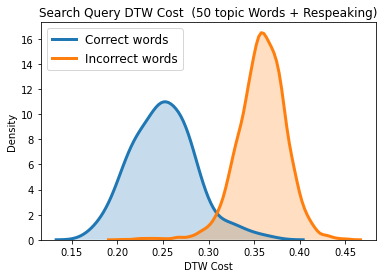

In [9]:
sns.kdeplot(x['match_dtw'], shade=True, linewidth = 3, label = 'Correct words')
sns.kdeplot(x['nomatch_dtw'], shade=True, linewidth = 3, label = 'Incorrect words')
    
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Search Query DTW Cost ' + plot_title)
plt.xlabel('DTW Cost')
plt.ylabel('Density')
plt.savefig(ftitle+'_dtw.png', dpi=400)